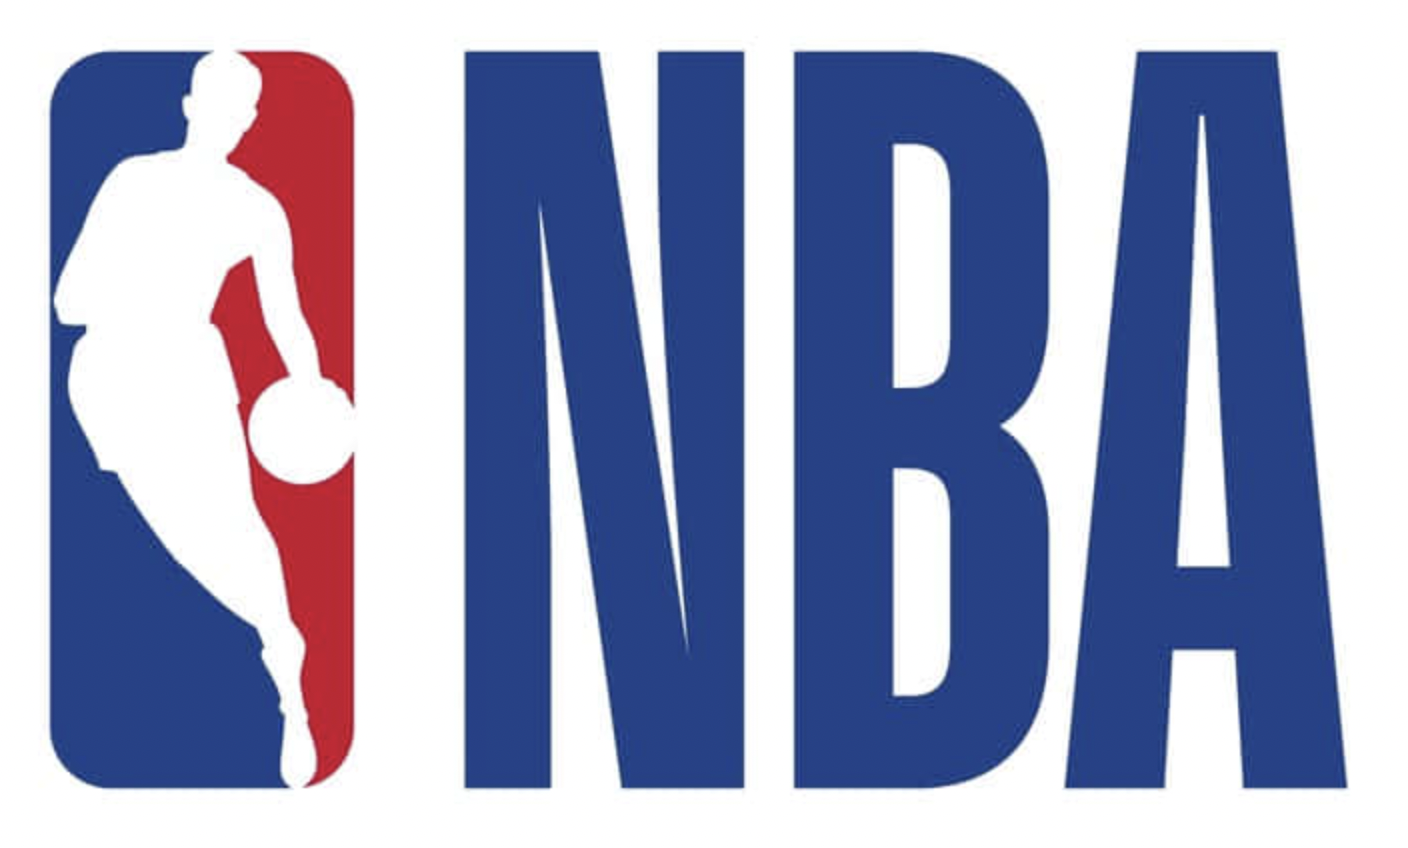

This project analyzes 2017 NBA data revolving around player stats, their salaries, and their popularity online (Twitter and Wikipedia). It is split into the following four sections: 

1) Preparation of the data (importing csv files, exporting as dataframes, and joining tables) 

2) Analysis of Player Salary and Twitter Popularity 

3) Analysis of Player Salary and Wikipedia Popularity

4) Analysis of Player Salary and PIE (Player Impact Estimate) 

(The dataset is used from Kaggle: https://www.kaggle.com/datasets/noahgift/social-power-nba)

# Section 1: Preparation of Data



In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import sqlite3   
 

from sqlalchemy import create_engine
engine = create_engine('sqlite:///', echo=True)


In [2]:
#Reading the CSV file containing the data relating to the NBA player and 
#how many times they have been viewed on Wikipedia.

df_wiki = pd.read_csv('nba_2017_player_wikipedia.csv')
df_wiki

,Unnamed: 0,names,pageviews,timestamps,wikipedia_handles
0,0,Russell Westbrook,3400,2016010100,Russell_Westbrook
1,1,Russell Westbrook,2893,2016010200,Russell_Westbrook
2,2,Russell Westbrook,3209,2016010300,Russell_Westbrook
3,3,Russell Westbrook,2531,2016010400,Russell_Westbrook
4,4,Russell Westbrook,2599,2016010500,Russell_Westbrook
...,...,...,...,...,...
162812,162812,Danuel House,74,2016122700,Danuel_House
162813,162813,Danuel House,99,2016122800,Danuel_House
162814,162814,Danuel House,102,2016122900,Danuel_House
162815,162815,Danuel House,114,2016123000,Danuel_House


In [3]:
# export the dataframe as a table to the sqlite engine
df_wiki.to_sql("wiki", con =engine)

2023-09-19 11:21:17,379 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("wiki")
2023-09-19 11:21:17,380 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:17,380 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("wiki")
2023-09-19 11:21:17,380 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:17,382 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:17,382 INFO sqlalchemy.engine.Engine 
CREATE TABLE wiki (
	"index" BIGINT, 
	"Unnamed: 0" BIGINT, 
	names TEXT, 
	pageviews BIGINT, 
	timestamps BIGINT, 
	wikipedia_handles TEXT
)


2023-09-19 11:21:17,383 INFO sqlalchemy.engine.Engine [no key 0.00039s] ()
2023-09-19 11:21:17,383 INFO sqlalchemy.engine.Engine CREATE INDEX ix_wiki_index ON wiki ("index")
2023-09-19 11:21:17,384 INFO sqlalchemy.engine.Engine [no key 0.00030s] ()
2023-09-19 11:21:17,384 INFO sqlalchemy.engine.Engine COMMIT
2023-09-19 11:21:17,408 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,034 INFO sqlalchemy.engin

162817

In [4]:
#Grouping this table by player name to make a more concise table.

sql1='''

Select names, sum(pageviews) AS TotalPageViews
from wiki
group by names

''';

    
df_sql1 = pd.read_sql_query(sql1,con=engine)
df_sql1

2023-09-19 11:21:18,283 INFO sqlalchemy.engine.Engine 

Select names, sum(pageviews) AS TotalPageViews
from wiki
group by names


2023-09-19 11:21:18,284 INFO sqlalchemy.engine.Engine [raw sql] ()


,names,TotalPageViews
0,A.J. Hammons,996
1,Aaron Brooks,4083
2,Aaron Gordon,627319
3,Aaron Harrison,222966
4,Adreian Payne,75343
...,...,...
450,Wilson Chandler,77575
451,Yogi Ferrell,160576
452,Zach LaVine,848226
453,Zach Randolph,262910


In [5]:
# export the dataframe as a table to the sqlite engine
df_sql1.to_sql("wiki_total", con =engine)

2023-09-19 11:21:18,373 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("wiki_total")
2023-09-19 11:21:18,374 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,374 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("wiki_total")
2023-09-19 11:21:18,374 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,375 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,375 INFO sqlalchemy.engine.Engine 
CREATE TABLE wiki_total (
	"index" BIGINT, 
	names TEXT, 
	"TotalPageViews" BIGINT
)


2023-09-19 11:21:18,376 INFO sqlalchemy.engine.Engine [no key 0.00024s] ()
2023-09-19 11:21:18,376 INFO sqlalchemy.engine.Engine CREATE INDEX ix_wiki_total_index ON wiki_total ("index")
2023-09-19 11:21:18,377 INFO sqlalchemy.engine.Engine [no key 0.00034s] ()
2023-09-19 11:21:18,377 INFO sqlalchemy.engine.Engine COMMIT
2023-09-19 11:21:18,378 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,380 INFO sqlalchemy.engine.Engine INSERT INTO wiki_total (

455

In [6]:
sql4='''

Select *
from wiki_total
''';

    
df_sql4 = pd.read_sql_query(sql4,con=engine)
df_sql4

2023-09-19 11:21:18,389 INFO sqlalchemy.engine.Engine 

Select *
from wiki_total

2023-09-19 11:21:18,390 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,names,TotalPageViews
0,0,A.J. Hammons,996
1,1,Aaron Brooks,4083
2,2,Aaron Gordon,627319
3,3,Aaron Harrison,222966
4,4,Adreian Payne,75343
...,...,...,...
450,450,Wilson Chandler,77575
451,451,Yogi Ferrell,160576
452,452,Zach LaVine,848226
453,453,Zach Randolph,262910


In [7]:
#Reading the CSV file containing the data relating to the NBA players: position, team, and salary. 

df_salary = pd.read_csv('nba_2017_salary.csv')
df_salary

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0
...,...,...,...,...
444,Jarrett Jack,PG,New Orleans Pelicans,57672.0
445,Pierre Jackson,PG,Dallas Mavericks,31969.0
446,Kevin Durant,SF,Golden State Warriors,26500000.0
447,James Harden,PG,Houston Rockets,26500000.0


In [8]:
# export the dataframe as a table to the sqlite engine
df_salary.to_sql("salary", con =engine)

2023-09-19 11:21:18,410 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("salary")
2023-09-19 11:21:18,410 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,411 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("salary")
2023-09-19 11:21:18,411 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,412 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,412 INFO sqlalchemy.engine.Engine 
CREATE TABLE salary (
	"index" BIGINT, 
	"NAME" TEXT, 
	"POSITION" TEXT, 
	"TEAM" TEXT, 
	"SALARY" FLOAT
)


2023-09-19 11:21:18,412 INFO sqlalchemy.engine.Engine [no key 0.00025s] ()
2023-09-19 11:21:18,413 INFO sqlalchemy.engine.Engine CREATE INDEX ix_salary_index ON salary ("index")
2023-09-19 11:21:18,413 INFO sqlalchemy.engine.Engine [no key 0.00028s] ()
2023-09-19 11:21:18,414 INFO sqlalchemy.engine.Engine COMMIT
2023-09-19 11:21:18,415 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,417 INFO sqlalchemy.engine.Engine INSERT INTO salary

449

In [9]:
#Reading the CSV file containing the data relating to each player's twitter favorite and retweet count. 

df_twitter = pd.read_csv('nba_2017_twitter_players.csv')
df_twitter

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0
...,...,...,...
324,Kyle Wiltjer,4.0,13.5
325,Alonzo Gee,NaN,NaN
326,Larry Sanders,24.5,18.0
327,Arinze Onuaku,0.0,1.0


In [10]:
# export the dataframe as a table to the sqlite engine
df_twitter.to_sql("twitter", con =engine)

2023-09-19 11:21:18,438 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("twitter")
2023-09-19 11:21:18,438 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,439 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("twitter")
2023-09-19 11:21:18,439 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,440 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,440 INFO sqlalchemy.engine.Engine 
CREATE TABLE twitter (
	"index" BIGINT, 
	"PLAYER" TEXT, 
	"TWITTER_FAVORITE_COUNT" FLOAT, 
	"TWITTER_RETWEET_COUNT" FLOAT
)


2023-09-19 11:21:18,440 INFO sqlalchemy.engine.Engine [no key 0.00022s] ()
2023-09-19 11:21:18,441 INFO sqlalchemy.engine.Engine CREATE INDEX ix_twitter_index ON twitter ("index")
2023-09-19 11:21:18,441 INFO sqlalchemy.engine.Engine [no key 0.00029s] ()
2023-09-19 11:21:18,442 INFO sqlalchemy.engine.Engine COMMIT
2023-09-19 11:21:18,443 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,444 INFO sqlalchemy.engine.Eng

329

In [11]:
#Joining these 3 tables together based on the common identifier: player name. 

sql6='''

Select
s.NAME,
s.salary,
s.position,
s.team, 
t.twitter_favorite_count,
t.twitter_retweet_count, 
w.TotalPageViews
From
wiki_total w,
twitter t,
salary s
where w.names = s.NAME and s.NAME = t.player

''';

df_sql6 = pd.read_sql_query(sql6,con=engine)
df_sql6


2023-09-19 11:21:18,453 INFO sqlalchemy.engine.Engine 

Select
s.NAME,
s.salary,
s.position,
s.team, 
t.twitter_favorite_count,
t.twitter_retweet_count, 
w.TotalPageViews
From
wiki_total w,
twitter t,
salary s
where w.names = s.NAME and s.NAME = t.player


2023-09-19 11:21:18,454 INFO sqlalchemy.engine.Engine [raw sql] ()


,NAME,SALARY,POSITION,TEAM,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TotalPageViews
0,Aaron Brooks,2700000.0,PG,Indiana Pacers,1.0,3.0,4083
1,Aaron Gordon,4351320.0,PF,Orlando Magic,42.5,16.0,627319
2,Adreian Payne,2022240.0,PF,Minnesota Timberwolves,0.0,13.0,75343
3,Al Horford,26540100.0,C,Boston Celtics,136.0,71.0,569636
4,Al-Farouq Aminu,7680965.0,SF,Portland Trail Blazers,33.0,9.0,221189
...,...,...,...,...,...,...,...
239,Willie Cauley-Stein,3551160.0,C,Sacramento Kings,0.0,17.0,194957
240,Willy Hernangomez,1435750.0,C,New York Knicks,0.0,55.5,325
241,Wilson Chandler,11233146.0,SF,Denver Nuggets,31.5,18.5,77575
242,Zach LaVine,2240880.0,PG,Minnesota Timberwolves,178.5,67.0,848226


In [12]:
# export the dataframe as a table to the sqlite engine
df_sql6.to_sql("combined_table", con =engine)

2023-09-19 11:21:18,467 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("combined_table")
2023-09-19 11:21:18,468 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,470 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("combined_table")
2023-09-19 11:21:18,471 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:18,471 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:18,472 INFO sqlalchemy.engine.Engine 
CREATE TABLE combined_table (
	"index" BIGINT, 
	"NAME" TEXT, 
	"SALARY" FLOAT, 
	"POSITION" TEXT, 
	"TEAM" TEXT, 
	"TWITTER_FAVORITE_COUNT" FLOAT, 
	"TWITTER_RETWEET_COUNT" FLOAT, 
	"TotalPageViews" BIGINT
)


2023-09-19 11:21:18,472 INFO sqlalchemy.engine.Engine [no key 0.00025s] ()
2023-09-19 11:21:18,473 INFO sqlalchemy.engine.Engine CREATE INDEX ix_combined_table_index ON combined_table ("index")
2023-09-19 11:21:18,473 INFO sqlalchemy.engine.Engine [no key 0.00020s] ()
2023-09-19 11:21:18,473 INFO sqlalchemy.engine.Engine COMMIT
2023-09-1

244

In [13]:
sql8='''

Select *
from combined_table
''';

    
df_sql8 = pd.read_sql_query(sql8,con=engine)
df_sql8

2023-09-19 11:21:18,484 INFO sqlalchemy.engine.Engine 

Select *
from combined_table

2023-09-19 11:21:18,487 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,NAME,SALARY,POSITION,TEAM,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TotalPageViews
0,0,Aaron Brooks,2700000.0,PG,Indiana Pacers,1.0,3.0,4083
1,1,Aaron Gordon,4351320.0,PF,Orlando Magic,42.5,16.0,627319
2,2,Adreian Payne,2022240.0,PF,Minnesota Timberwolves,0.0,13.0,75343
3,3,Al Horford,26540100.0,C,Boston Celtics,136.0,71.0,569636
4,4,Al-Farouq Aminu,7680965.0,SF,Portland Trail Blazers,33.0,9.0,221189
...,...,...,...,...,...,...,...,...
239,239,Willie Cauley-Stein,3551160.0,C,Sacramento Kings,0.0,17.0,194957
240,240,Willy Hernangomez,1435750.0,C,New York Knicks,0.0,55.5,325
241,241,Wilson Chandler,11233146.0,SF,Denver Nuggets,31.5,18.5,77575
242,242,Zach LaVine,2240880.0,PG,Minnesota Timberwolves,178.5,67.0,848226


# Section 2: Analysis of Player Salary & Twitter Popularity 


In [14]:
#viewing the 50 players with the largest salary 
sql9='''

Select NAME, SALARY, TWITTER_FAVORITE_COUNT, TWITTER_RETWEET_COUNT
from combined_table
order by SALARY DESC
limit 50
''';

    
df_sql9 = pd.read_sql_query(sql9,con=engine)
df_sql9

2023-09-19 11:21:18,503 INFO sqlalchemy.engine.Engine 

Select NAME, SALARY, TWITTER_FAVORITE_COUNT, TWITTER_RETWEET_COUNT
from combined_table
order by SALARY DESC
limit 50

2023-09-19 11:21:18,505 INFO sqlalchemy.engine.Engine [raw sql] ()


,NAME,SALARY,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,LeBron James,30963450.0,5533.5,1501.5
1,Al Horford,26540100.0,136.0,71.0
2,Mike Conley,26540100.0,257.5,90.0
3,James Harden,26500000.0,969.0,321.5
4,Kevin Durant,26500000.0,1425.5,366.0
5,Russell Westbrook,26500000.0,2130.5,559.0
6,Dirk Nowitzki,25000000.0,1564.0,500.5
7,Carmelo Anthony,24559380.0,720.5,220.0
8,Damian Lillard,24328425.0,186.5,43.0
9,Dwyane Wade,23200000.0,349.5,149.5


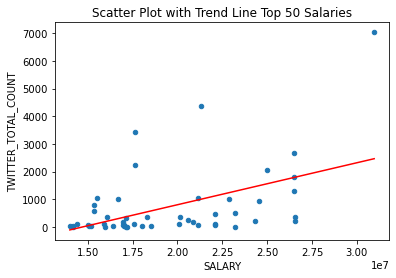

In [15]:
#Adding a new column to the dataframe to get a column showing the sum of Twitter favorite and retweet count. 

df_sql9["TWITTER_TOTAL_COUNT"] = df_sql9["TWITTER_FAVORITE_COUNT"] + df_sql9["TWITTER_RETWEET_COUNT"]

#plotting to see pattern between salary number and sum of favorite and retweet count
df_sql9.plot.scatter(x="SALARY", y="TWITTER_TOTAL_COUNT")

#plotting the trend line
coefficients = np.polyfit(df_sql9["SALARY"], df_sql9["TWITTER_TOTAL_COUNT"],1)
trend_line = np.poly1d(coefficients)
plt.plot(df_sql9["SALARY"], trend_line(df_sql9["SALARY"]),color="red", label="Trend Line")
plt.title("Scatter Plot with Trend Line Top 50 Salaries")
plt.show()

In [16]:
#find correlation coefficient 
df_sql9.corr()

,SALARY,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_TOTAL_COUNT
SALARY,1.000000,0.512487,0.349932,0.489890
TWITTER_FAVORITE_COUNT,0.512487,1.000000,0.746832,0.976607
TWITTER_RETWEET_COUNT,0.349932,0.746832,1.000000,0.872360
TWITTER_TOTAL_COUNT,0.489890,0.976607,0.872360,1.000000


In [17]:
#viewing the 50 players with the lowest salary 
sql10='''

Select NAME, SALARY, TWITTER_FAVORITE_COUNT, TWITTER_RETWEET_COUNT
from combined_table
order by SALARY 
limit 50
''';

    
df_sql10 = pd.read_sql_query(sql10,con=engine)
df_sql10

2023-09-19 11:21:18,754 INFO sqlalchemy.engine.Engine 

Select NAME, SALARY, TWITTER_FAVORITE_COUNT, TWITTER_RETWEET_COUNT
from combined_table
order by SALARY 
limit 50

2023-09-19 11:21:18,754 INFO sqlalchemy.engine.Engine [raw sql] ()


,NAME,SALARY,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Alonzo Gee,57672.0,NaN,NaN
1,Anthony Brown,57672.0,3.0,3.0
2,Jarrett Jack,57672.0,11.5,7.0
3,Manny Harris,115344.0,2.0,3.0
4,Larry Sanders,207722.0,24.5,18.0
5,Andrew Bogut,242224.0,57.0,4.0
6,Lamar Patterson,246956.0,4.0,4.0
7,Anthony Bennett,1015696.0,9.0,10.5
8,Isaiah Canaan,1015696.0,24.5,8.0
9,John Jenkins,1050961.0,3.0,1.0


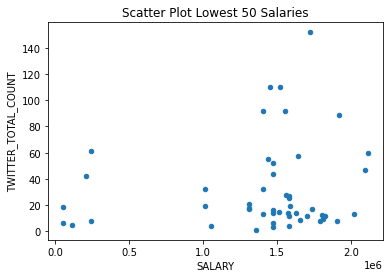

In [18]:
#Adding a new column to the dataframe to get a column showing the sum of Twitter favorite and retweet count. 

df_sql10["TWITTER_TOTAL_COUNT"] = df_sql10["TWITTER_FAVORITE_COUNT"] + df_sql10["TWITTER_RETWEET_COUNT"]

#plotting to see pattern between salary number and sum of favorite and retweet count
df_sql10.plot.scatter(x="SALARY", y="TWITTER_TOTAL_COUNT")

#plotting the trend line
coefficients = np.polyfit(df_sql10["SALARY"], df_sql10["TWITTER_TOTAL_COUNT"],1)
trend_line = np.poly1d(coefficients)
plt.plot(df_sql10["SALARY"], trend_line(df_sql10["SALARY"]),color="red", label="Trend Line")
plt.title("Scatter Plot Lowest 50 Salaries")
plt.show()

In [19]:
#find correlation coefficient 
df_sql10.corr()

,SALARY,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,TWITTER_TOTAL_COUNT
SALARY,1.000000,0.048442,0.195459,0.133521
TWITTER_FAVORITE_COUNT,0.048442,1.000000,0.237793,0.876846
TWITTER_RETWEET_COUNT,0.195459,0.237793,1.000000,0.675488
TWITTER_TOTAL_COUNT,0.133521,0.876846,0.675488,1.000000


## TAKEAWAYS

For the higher-salary earning NBA players, the data shows a moderate positive correlation for the player salary and Twitter popularity. In other words, the higher the player salary, the more likely that player tends to be popular on Twitter. The correlation coefficient for this is 0.49, thus the moderate positive correlation.

However, for the lower-salary earning NBA players, the data doesn't show a strong correlation as the correlation coefficient is 0.13. 

Thus, because these higher-salary NBA players are more well known and may have a stronger fan base, their popularity on Twitter tends to be higher. 

# Section 3: Analysis of Player Salary & Wikipedia Popularity 

In [20]:
#viewing the 50 players with the largest salary 
sql11='''

Select NAME, SALARY, TotalPageViews
from combined_table
order by SALARY DESC
limit 50
''';

    
df_sql11 = pd.read_sql_query(sql11,con=engine)
df_sql11

2023-09-19 11:21:18,858 INFO sqlalchemy.engine.Engine 

Select NAME, SALARY, TotalPageViews
from combined_table
order by SALARY DESC
limit 50

2023-09-19 11:21:18,859 INFO sqlalchemy.engine.Engine [raw sql] ()


,NAME,SALARY,TotalPageViews
0,LeBron James,30963450.0,8823785
1,Al Horford,26540100.0,569636
2,Mike Conley,26540100.0,5111
3,James Harden,26500000.0,1337869
4,Kevin Durant,26500000.0,3865014
5,Russell Westbrook,26500000.0,2367837
6,Dirk Nowitzki,25000000.0,1303433
7,Carmelo Anthony,24559380.0,1712575
8,Damian Lillard,24328425.0,926756
9,Dwyane Wade,23200000.0,2694345


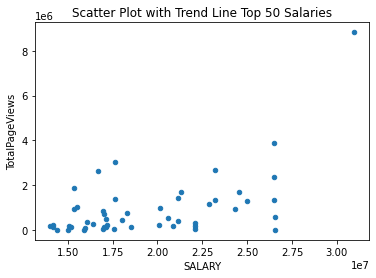

In [21]:
#plotting to see pattern between salary number and total wikipedia page views 
df_sql11.plot.scatter(x="SALARY", y="TotalPageViews")

#plotting the trend line
coefficients2 = np.polyfit(df_sql11["SALARY"], df_sql11["TotalPageViews"],1)
trend_line2 = np.poly1d(coefficients2)
plt.plot(df_sql11["SALARY"], trend_line(df_sql11["SALARY"]),color="red", label="Trend Line")
plt.title("Scatter Plot with Trend Line Top 50 Salaries")
plt.show()

In [22]:
#find correlation coefficient 
df_sql11.corr()

,SALARY,TotalPageViews
SALARY,1.000000,0.540796
TotalPageViews,0.540796,1.000000


In [23]:
#viewing the 50 players with the lowest salary 
sql12='''

Select NAME, SALARY, TotalPageViews
from combined_table
order by SALARY 
limit 50
''';

    
df_sql12 = pd.read_sql_query(sql12,con=engine)
df_sql12

2023-09-19 11:21:18,953 INFO sqlalchemy.engine.Engine 

Select NAME, SALARY, TotalPageViews
from combined_table
order by SALARY 
limit 50

2023-09-19 11:21:18,954 INFO sqlalchemy.engine.Engine [raw sql] ()


,NAME,SALARY,TotalPageViews
0,Alonzo Gee,57672.0,47575
1,Anthony Brown,57672.0,4596
2,Jarrett Jack,57672.0,122645
3,Manny Harris,115344.0,27415
4,Larry Sanders,207722.0,20132
5,Andrew Bogut,242224.0,877577
6,Lamar Patterson,246956.0,36143
7,Anthony Bennett,1015696.0,9388
8,Isaiah Canaan,1015696.0,97905
9,John Jenkins,1050961.0,3643


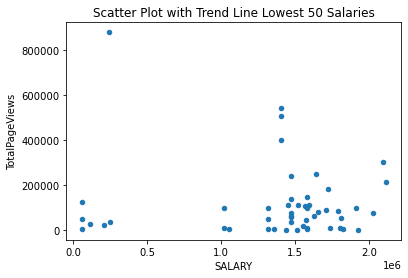

In [24]:
#plotting to see pattern between salary number and total wikipedia page views
df_sql12.plot.scatter(x="SALARY", y="TotalPageViews")

#plotting the trend line
coefficients2 = np.polyfit(df_sql12["SALARY"], df_sql12["TotalPageViews"],1)
trend_line2 = np.poly1d(coefficients2)
plt.plot(df_sql12["SALARY"], trend_line(df_sql11["SALARY"]),color="red", label="Trend Line")
plt.title("Scatter Plot with Trend Line Lowest 50 Salaries")
plt.show()

In [25]:
#find correlation coefficient 
df_sql12.corr()

,SALARY,TotalPageViews
SALARY,1.000000,-0.078516
TotalPageViews,-0.078516,1.000000


## TAKEAWAYS

For the higher-salary earning NBA players, the data shows a strong positive correlation for the player salary and Wikipedia popularity. In other words, the higher the player salary, the more likely that player tends to be more searched on Wikipedia. The correlation coefficient for this is 0.54, thus the strong positive correlation.

However, for the lower-salary earnning NBA players, the data doesn't show a strong correlation as the correlation coefficient is -0.08. 

Thus, because these higher-salary NBA players are more well known and may have a stronger fan base, their popularity on Wikipedia tends to be higher. 

# Section 4: Analysis of Player Salary & PIE (Player Impact Estimate)

In [26]:
#reading this csv file containing specific player stats 
df_playerstats = pd.read_csv('nba_2017_players_stats_combined.csv')
df_playerstats

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,441,480,Michael Gbinije,SG,24,3.6,0.1,1.1,0.100,0.0,...,DET,9,3.6,-2.17,-0.17,-2.34,0.02,-2.7,91.34,7
442,442,481,John Lucas III,PG,34,2.2,0.2,0.8,0.250,0.0,...,MIN,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3
443,443,482,Aaron Harrison,SG,22,3.4,0.0,0.8,0.000,0.0,...,CHA,5,3.4,-1.42,-0.32,-1.74,0.01,0.0,92.43,2
444,444,483,Ben Bentil,PF,21,3.3,0.0,1.0,0.000,0.0,...,DAL,3,3.3,-1.95,0.65,-1.30,0.01,-6.1,106.15,2


In [27]:
# export the dataframe as a table to the sqlite engine
df_playerstats.to_sql("playerstats", con =engine)

2023-09-19 11:21:19,071 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("playerstats")
2023-09-19 11:21:19,073 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:19,074 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("playerstats")
2023-09-19 11:21:19,076 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-19 11:21:19,078 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-19 11:21:19,080 INFO sqlalchemy.engine.Engine 
CREATE TABLE playerstats (
	"index" BIGINT, 
	"Unnamed: 0" BIGINT, 
	"Rk" BIGINT, 
	"PLAYER" TEXT, 
	"POSITION" TEXT, 
	"AGE" BIGINT, 
	"MP" FLOAT, 
	"FG" FLOAT, 
	"FGA" FLOAT, 
	"FG%" FLOAT, 
	"3P" FLOAT, 
	"3PA" FLOAT, 
	"3P%" FLOAT, 
	"2P" FLOAT, 
	"2PA" FLOAT, 
	"2P%" FLOAT, 
	"eFG%" FLOAT, 
	"FT" FLOAT, 
	"FTA" FLOAT, 
	"FT%" FLOAT, 
	"ORB" FLOAT, 
	"DRB" FLOAT, 
	"TRB" FLOAT, 
	"AST" FLOAT, 
	"STL" FLOAT, 
	"BLK" FLOAT, 
	"TOV" FLOAT, 
	"PF" FLOAT, 
	"POINTS" FLOAT, 
	"TEAM" TEXT, 
	"GP" BIGINT, 
	"MPG" FLOAT, 
	"ORPM" FLOAT, 
	"DRPM" FLOAT, 
	

446

In [28]:
sql13='''

Select * 
from playerstats
''';

    
df_sql13 = pd.read_sql_query(sql13,con=engine)
df_sql13


2023-09-19 11:21:19,111 INFO sqlalchemy.engine.Engine 

Select * 
from playerstats

2023-09-19 11:21:19,111 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,441,441,480,Michael Gbinije,SG,24,3.6,0.1,1.1,0.100,...,DET,9,3.6,-2.17,-0.17,-2.34,0.02,-2.7,91.34,7
442,442,442,481,John Lucas III,PG,34,2.2,0.2,0.8,0.250,...,MIN,5,2.2,-1.30,-0.61,-1.91,0.01,7.3,94.47,3
443,443,443,482,Aaron Harrison,SG,22,3.4,0.0,0.8,0.000,...,CHA,5,3.4,-1.42,-0.32,-1.74,0.01,0.0,92.43,2
444,444,444,483,Ben Bentil,PF,21,3.3,0.0,1.0,0.000,...,DAL,3,3.3,-1.95,0.65,-1.30,0.01,-6.1,106.15,2


In [29]:
#look at player names with top 50 salaries and their PIE score to see if there is a correlation 
#between salary and pie 

sql14='''

Select twitter.PLAYER, playerstats.PIE, salary.SALARY
from twitter
inner join playerstats on twitter.PLAYER = playerstats.PLAYER
inner join salary on twitter.PLAYER = salary.NAME
order by salary.SALARY 
''';

    
df_sql14 = pd.read_sql_query(sql14,con=engine)
df_sql14


2023-09-19 11:21:19,137 INFO sqlalchemy.engine.Engine 

Select twitter.PLAYER, playerstats.PIE, salary.SALARY
from twitter
inner join playerstats on twitter.PLAYER = playerstats.PLAYER
inner join salary on twitter.PLAYER = salary.NAME
order by salary.SALARY 

2023-09-19 11:21:19,137 INFO sqlalchemy.engine.Engine [raw sql] ()


,PLAYER,PIE,SALARY
0,Anthony Brown,5.8,57672.0
1,Jarrett Jack,5.1,57672.0
2,Alonzo Gee,0.8,57672.0
3,Mike Tobey,-1.6,67135.0
4,Andrew Bogut,9.2,242224.0
...,...,...,...
244,James Harden,19.0,26500000.0
245,Kevin Durant,18.6,26500000.0
246,Mike Conley,16.0,26540100.0
247,Al Horford,12.5,26540100.0


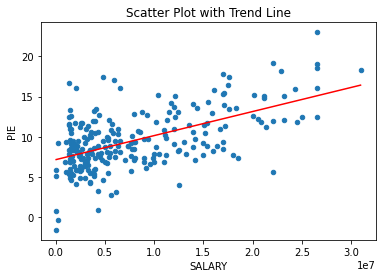

In [30]:
#plotting to see pattern between salary number and sum of favorite and retweet count
df_sql14.plot.scatter(x="SALARY", y="PIE")

#plotting the trend line
coefficients = np.polyfit(df_sql14["SALARY"], df_sql14["PIE"],1)
trend_line = np.poly1d(coefficients)
plt.plot(df_sql14["SALARY"], trend_line(df_sql14["SALARY"]),color="red", label="Trend Line")
plt.title("Scatter Plot with Trend Line")
plt.show()

In [31]:
#find correlation coefficient 
df_sql14.corr()

,PIE,SALARY
PIE,1.000000,0.570399
SALARY,0.570399,1.000000


## TAKEAWAYS

For the higher-salary earning NBA players, the data shows a strong positive correlation for the player salary and PIE value. In other words, the higher the player salary, the better the player is in game perfomance. The correlation coefficient for this is 0.57, thus the strong positive correlation.

For future analysis, it would be interesting to see if the player's salaries increased as their PIE value increased, or if there were additional factors playing a factor in this salary increase. 